In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("weight-height.csv")
print("Dataset loaded successfully!\n")
print(df.head())

Dataset loaded successfully!

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [3]:
print("\nDataset Information:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB
None

Statistical Summary:
             Height        Weight
count  10000.000000  10000.000000
mean      66.397560    161.440357
std        4.237001     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.319161    161.212928
75%       69.179914    187.169525
max      172.800844    269.989698


In [4]:
# Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
Gender    0
Height    0
Weight    0
dtype: int64


In [8]:
# Encode 'Gender' column (Male=1, Female=0)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
# Define features (X) and target (y)
X = df[['Height', 'Weight']]
y = df['Gender']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [9]:
# Step 4: Split into training and test sets
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])



Training samples: 8000
Testing samples: 2000


In [15]:
#Step 5: Train KNN Classifier
# --------------------------------------------
# Try different values of k
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)



✅ Model Accuracy (k=5): 91.50%

Classification Report:
              precision    recall  f1-score   support

      Female       0.92      0.91      0.91       988
        Male       0.91      0.92      0.92      1012

    accuracy                           0.92      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.92      0.92      0.91      2000



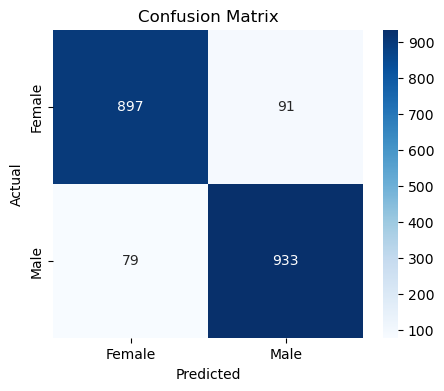

In [13]:
# Step 6: Evaluate the model
# --------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy (k={k}): {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Female', 'Male']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


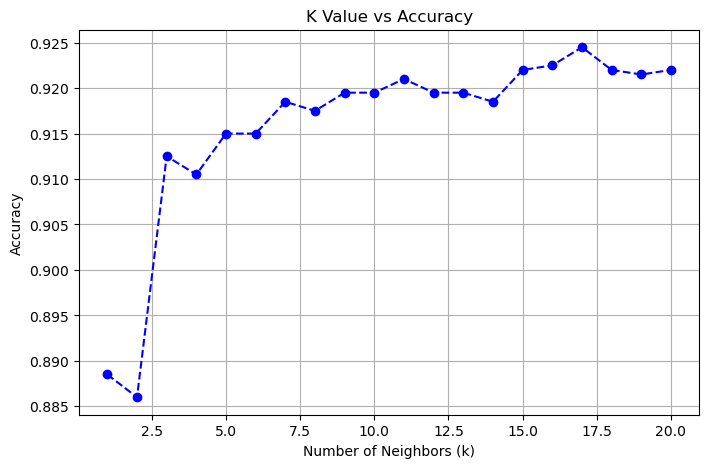

In [14]:
# Step 7: Visualize K-value vs Accuracy
# --------------------------------------------
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--', color='blue')
plt.title("K Value vs Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()